14장. 모델 성능 향상

데이터 확인과 검증셋
- 학습이 끝난 모델을 테스트해 보는 것이 테스트셋의 목적이라면, 최적 학습파라미터를 찾기 위해 학습 과정에서 사용하는 것이 검증셋
- 검증셋을 설정하면 검증셋에 테스트한 결과를 추적하면서 최적의 모델을 만들 수 있음
- 학습셋 : 검증셋 : 테스트셋 = 0.6 : 0.2 : 0.2

In [270]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [271]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [272]:
%cd /content/drive/MyDrive/mulcam_bigdata/data_모두의딥러닝

/content/drive/MyDrive/mulcam_bigdata/data_모두의딥러닝


In [273]:
path = './wine.csv'

In [274]:
pd.read_csv(path, header = None)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [275]:
df = pd.read_csv(path, header = None)

In [276]:
df.shape

(6497, 13)

In [277]:
# 독립변수(x) : wine 속성
# 종속변수(y) : 와인분류라벨(red wine / white wine)

df[:3]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1


In [278]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [279]:
# train_test set
x_train, x_test, y_train, y_test = \
train_test_split(x,y, test_size = 0.2, shuffle = True)

In [280]:
# 모델 구조 설정
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12,activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                390       
                                                                 
 dense_37 (Dense)            (None, 12)                372       
                                                                 
 dense_38 (Dense)            (None, 8)                 104       
                                                                 
 dense_39 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [281]:
# 모델 컴파일
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# 'binary_crossentropy'는 이진 분류 문제에 사용되는 손실 함수
# 'adam'은 최적화 알고리즘
# accuracy는 모델의 정확도를 평가하는 메트릭

In [282]:
%pwd

'/content/drive/MyDrive/mulcam_bigdata/data_모두의딥러닝'

검증셋 적용

In [283]:
# 모델 실행(fit >> train data)

history = model.fit(x_train, y_train, epochs = 50, batch_size = 500,
                    validation_split = 0.25)
                    # train data의 25%를 validation data로 활용

Epoch 1/50
8/8 [==============================] - 2s 39ms/step - loss: 1.3013 - accuracy: 0.7452 - val_loss: 0.6687 - val_accuracy: 0.7785
Epoch 2/50
8/8 [==============================] - 0s 9ms/step - loss: 0.5585 - accuracy: 0.7398 - val_loss: 0.5343 - val_accuracy: 0.7477
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 0.4208 - accuracy: 0.7691 - val_loss: 0.3433 - val_accuracy: 0.8062
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.3729 - accuracy: 0.8042 - val_loss: 0.2879 - val_accuracy: 0.8869
Epoch 5/50
8/8 [==============================] - 0s 7ms/step - loss: 0.3173 - accuracy: 0.9009 - val_loss: 0.2878 - val_accuracy: 0.9285
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.2931 - accuracy: 0.9079 - val_loss: 0.2575 - val_accuracy: 0.9162
Epoch 7/50
8/8 [==============================] - 0s 8ms/step - loss: 0.2721 - accuracy: 0.9135 - val_loss: 0.2516 - val_accuracy: 0.9392
Epoch 8/50
8/8 [===============

In [284]:
# 테스트 결과 출력
score = model.evaluate(x_test, y_test)
print('Test Dataset ACC: ', round(score[1],2))
# Test Dataset ACC: 0.98

41/41 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9600
Test Dataset ACC:  0.96


모델 업데이트

In [285]:
%cd /content/drive/MyDrive/mulcam_bigdata/09_DL/MODEL

/content/drive/MyDrive/mulcam_bigdata/09_DL/MODEL


In [286]:
# 모델 저장 설정
modelpath = './{epoch:02d}-{val_accuracy:.04f}.hdf5'
# 플레이스홀더({epoch:02d}-{val_accuracy:.04f}.hdf5)는 모델을 저장할 때 에포크 번호와 검증 정확도로 대체

In [287]:
# 모델 성능을 식별하는데 도움
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
# checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
# verbose=1 현황 모니터링 가능
# save_best_only=True

In [288]:
# 모델 실행(fit >> train data)

history = model.fit(x_train, y_train, epochs = 50, batch_size = 500,
                    validation_split = 0.25, verbose=0, callbacks = [checkpointer])

# callbacks = [] : 훈련 과정 중 특정 시점에 호출되는 콜백함수 목록
# >> checkpointer : 모델의 검증 정확도가 개선될 때마다 모델을 저장


Epoch 1: val_loss improved from inf to 0.12889, saving model to ./01-0.9554.hdf5

Epoch 2: val_loss improved from 0.12889 to 0.12711, saving model to ./02-0.9569.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss improved from 0.12711 to 0.12430, saving model to ./03-0.9585.hdf5

Epoch 4: val_loss improved from 0.12430 to 0.11982, saving model to ./04-0.9638.hdf5

Epoch 5: val_loss improved from 0.11982 to 0.11636, saving model to ./05-0.9654.hdf5

Epoch 6: val_loss improved from 0.11636 to 0.11218, saving model to ./06-0.9608.hdf5

Epoch 7: val_loss improved from 0.11218 to 0.11144, saving model to ./07-0.9662.hdf5

Epoch 8: val_loss improved from 0.11144 to 0.11143, saving model to ./08-0.9669.hdf5

Epoch 9: val_loss improved from 0.11143 to 0.09839, saving model to ./09-0.9700.hdf5

Epoch 10: val_loss did not improve from 0.09839

Epoch 11: val_loss did not improve from 0.09839

Epoch 12: val_loss improved from 0.09839 to 0.09075, saving model to ./12-0.9715.hdf5

Epoch 13: val_loss improved from 0.09075 to 0.08888, saving model to ./13-0.9715.hdf5

Epoch 14: val_loss did not improve from 0.08888

Epoch 15: val_loss improved from 0.08888 to 0.08819, saving model to ./15-0.

In [289]:
# 테스트 결과 출력
score = model.evaluate(x_test, y_test)
print('Test Dataset ACC: ', round(score[1],2))
# Test Dataset ACC: 0.98

41/41 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9808
Test Dataset ACC:  0.98


과적합 확인하기

In [290]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 500,
                    validation_split = 0.25, verbose=0, callbacks = [checkpointer])



Epoch 1: val_loss improved from 0.06761 to 0.06758, saving model to ./01-0.9792.hdf5

Epoch 2: val_loss improved from 0.06758 to 0.06643, saving model to ./02-0.9792.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_loss did not improve from 0.06643

Epoch 4: val_loss did not improve from 0.06643

Epoch 5: val_loss did not improve from 0.06643

Epoch 6: val_loss improved from 0.06643 to 0.06558, saving model to ./06-0.9808.hdf5

Epoch 7: val_loss did not improve from 0.06558

Epoch 8: val_loss did not improve from 0.06558

Epoch 9: val_loss improved from 0.06558 to 0.06445, saving model to ./09-0.9808.hdf5

Epoch 10: val_loss improved from 0.06445 to 0.06379, saving model to ./10-0.9808.hdf5

Epoch 11: val_loss did not improve from 0.06379

Epoch 12: val_loss did not improve from 0.06379

Epoch 13: val_loss did not improve from 0.06379

Epoch 14: val_loss improved from 0.06379 to 0.06307, saving model to ./14-0.9800.hdf5

Epoch 15: val_loss improved from 0.06307 to 0.06296, saving model to ./15-0.9815.hdf5

Epoch 16: val_loss did not improve from 0.06296

Epoch 17: val_loss improved from 0.06296 to 0.06275, saving model to ./17-0.9808.hdf5

Epoch 18: val_loss did not improve from 0.0

In [291]:
history.history
# loss, accuracy, val_loss, val_accuracy 는 history.history 에 포함되어 있음

{'loss': [0.06834335625171661,
  0.06652641296386719,
  0.06523549556732178,
  0.06581481546163559,
  0.06591975688934326,
  0.0656251534819603,
  0.06499543786048889,
  0.06440373510122299,
  0.06534858793020248,
  0.06329808384180069,
  0.0644339993596077,
  0.06503696739673615,
  0.06838509440422058,
  0.06293390691280365,
  0.06339912861585617,
  0.06319455802440643,
  0.06398016959428787,
  0.06263968348503113,
  0.06339363008737564,
  0.06218142434954643,
  0.06554005295038223,
  0.06611580401659012,
  0.06463051587343216,
  0.06130717694759369,
  0.06065637618303299,
  0.05970907583832741,
  0.06399010866880417,
  0.06067777797579765,
  0.061095889657735825,
  0.06031009554862976,
  0.05866360291838646,
  0.0589921697974205,
  0.05930034816265106,
  0.05859009921550751,
  0.05955193191766739,
  0.060138802975416183,
  0.05995793640613556,
  0.06054602190852165,
  0.058962948620319366,
  0.06118335202336311,
  0.058421388268470764,
  0.057889364659786224,
  0.058850616216659546,


In [292]:
# 그래프로 과적합 여부 확인
# >> 역전파를 50번 반복하면서 과적합이 있었는가?
# >> 적절한 학습 횟수를 정하기 위해서는 검증셋과 테스트셋의 결과를 그래프로 보는 것이 가장 좋음
pd.DataFrame(history.history)
# history : model.fit 함수가 반환하는 객체로, 훈련 과정에서 수집된 모든 메트릭과 손실 값을 포함
# 속성은 딕셔너리 형태로, 키는 메트릭의 이름(예: 'loss', 'accuracy', 'val_loss', 'val_accuracy')이고,
# 값은 각 에포크마다 해당 메트릭의 값이 리스트로 저장

,loss,accuracy,val_loss,val_accuracy
0,0.068343,0.981781,0.067576,0.979231
1,0.066526,0.982551,0.066434,0.979231
2,0.065235,0.981268,0.067048,0.980769
3,0.065815,0.982294,0.066846,0.980769
4,0.065920,0.983064,0.067743,0.980769
5,0.065625,0.982294,0.065580,0.980769
6,0.064995,0.981524,0.066176,0.980769
7,0.064404,0.982807,0.065625,0.980769
8,0.065349,0.981011,0.064451,0.980769
9,0.063298,0.982551,0.063786,0.980769


In [293]:
hist_df = pd.DataFrame(history.history)

# val_loss, train_loss() 변화
y_vloss = hist_df['val_loss']  # 검증 손실 값(오차)
y_loss = hist_df['loss']  # 훈련 손실 값

# x값을 지정, 검증용 셋의 오차 >> 빨간색, 학습용 셋의 오차 >> 파란색

np.arange(len(y_loss))  # 훈련 손실 값 원소 개수

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

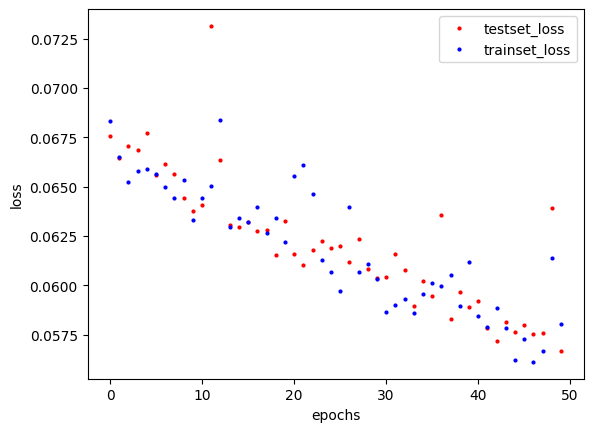

In [294]:
x_len = np.arange(len(y_loss)) #x_len >> epochs

plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label='testset_loss')
plt.plot(x_len, y_loss, "o", c='blue', markersize=2, label='trainset_loss')

plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

early_stopping_callback 조기 중단 적용
- 조기 중단 적용 전 정확도 95%

In [295]:
%pwd

'/content/drive/MyDrive/mulcam_bigdata/09_DL/MODEL'

In [296]:
modelpath = "./CH14-4-bestmodel.hdf5"

In [297]:
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1, save_best_only=True)
# ModelCheckpoint는 keras에서 제공하는 콜백 함수로, 훈련 중 특정 시점에 모델을 저장

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)
# EarlyStopping은 훈련 중 모델의 성능이 더 이상 향상되지 않을 때 훈련을 조기에 중단하는 콜백 함수
# monitor='val_loss': 훈련 중 검증 손실을 모니터링
# patience=20: 개선이 없을 때 조기 중단하기 전에 기다릴 에포크 수를 지정

In [298]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 500,
                    validation_split = 0.25, callbacks = [early_stopping_callback, checkpointer])

# callbacks = [] : 훈련 과정 중 특정 시점에 호출되는 콜백함수 목록
# >> early_stopping_callback : 모델의 성능이 개선되지 않을 때 훈련을 조기에 중단
# >> checkpointer : 모델의 검증 정확도가 개선될 때마다 모델을 저장

Epoch 1/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0403 - accuracy: 0.9840
Epoch 1: val_loss improved from inf to 0.05796, saving model to ./CH14-4-bestmodel.hdf5
8/8 [==============================] - 0s 32ms/step - loss: 0.0557 - accuracy: 0.9843 - val_loss: 0.0580 - val_accuracy: 0.9815
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0448 - accuracy: 0.9840
Epoch 2: val_loss improved from 0.05796 to 0.05668, saving model to ./CH14-4-bestmodel.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 21ms/step - loss: 0.0565 - accuracy: 0.9841 - val_loss: 0.0567 - val_accuracy: 0.9823
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0736 - accuracy: 0.9800
Epoch 3: val_loss improved from 0.05668 to 0.05575, saving model to ./CH14-4-bestmodel.hdf5
8/8 [==============================] - 0s 26ms/step - loss: 0.0556 - accuracy: 0.9846 - val_loss: 0.0558 - val_accuracy: 0.9831
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0350 - accuracy: 0.9840
Epoch 4: val_loss did not improve from 0.05575
8/8 [==============================] - 0s 12ms/step - loss: 0.0555 - accuracy: 0.9838 - val_loss: 0.0562 - val_accuracy: 0.9838
Epoch 5/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0347 - accuracy: 0.9920
Epoch 5: val_loss did not improve from 0.05575
8/8 [==============================] - 0s 10ms/step - loss: 0.0561 - accuracy: 0.9831 - val_loss: 0.0562 - val_accuracy: 0.9831
Epoch 6/50
1/8 [==>.......

In [299]:
# 테스트 결과 출력
score = model.evaluate(x_test, y_test)
print('Test Dataset ACC: ', round(score[1],2))
# Test Dataset ACC: 0.98

41/41 [==============================] - 0s 2ms/step - loss: 0.0719 - accuracy: 0.9769
Test Dataset ACC:  0.98


In [300]:
# 그래프로 과적합 여부 확인

pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.055673,0.984347,0.057956,0.981538
1,0.056511,0.984090,0.056678,0.982308
2,0.055621,0.984604,0.055751,0.983077
3,0.055459,0.983834,0.056169,0.983846
4,0.056050,0.983064,0.056159,0.983077
5,0.054848,0.985887,0.056952,0.983846
6,0.055647,0.984347,0.060371,0.980000
7,0.055874,0.984860,0.059178,0.981538
8,0.060206,0.983320,0.069748,0.976154
9,0.058985,0.983064,0.057058,0.981538


In [301]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 500,
                    validation_split = 0.25, callbacks = [early_stopping_callback, checkpointer])

hist_df = pd.DataFrame(history.history)

# val_loss, val_acc 변화 보고 싶어요

y_vloss = hist_df['val_loss']
y_loss = hist_df['loss']

# x값을 지정,검증용 셋의 오차 >> 빨간색, 학습용 셋의 오차 >> 파란색

np.arange(len(y_loss))

Epoch 1/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0869 - accuracy: 0.9760
Epoch 1: val_loss did not improve from 0.05169
8/8 [==============================] - 0s 28ms/step - loss: 0.0568 - accuracy: 0.9849 - val_loss: 0.0626 - val_accuracy: 0.9831
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0677 - accuracy: 0.9860
Epoch 2: val_loss did not improve from 0.05169
8/8 [==============================] - 0s 11ms/step - loss: 0.0528 - accuracy: 0.9859 - val_loss: 0.0749 - val_accuracy: 0.9738
Epoch 3/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0943 - accuracy: 0.9760
Epoch 3: val_loss did not improve from 0.05169
8/8 [==============================] - 0s 13ms/step - loss: 0.0590 - accuracy: 0.9833 - val_loss: 0.0555 - val_accuracy: 0.9815
Epoch 4/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0594 - accuracy: 0.9880
Epoch 4: val_loss did not improve from 0.05169
8/8 [==============================] - 0s 9ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 0s 27ms/step - loss: 0.0489 - accuracy: 0.9861 - val_loss: 0.0513 - val_accuracy: 0.9846
Epoch 14/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0294 - accuracy: 0.9900
Epoch 14: val_loss improved from 0.05133 to 0.05070, saving model to ./CH14-4-bestmodel.hdf5
8/8 [==============================] - 0s 20ms/step - loss: 0.0488 - accuracy: 0.9874 - val_loss: 0.0507 - val_accuracy: 0.9846
Epoch 15/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0244 - accuracy: 0.9940
Epoch 15: val_loss did not improve from 0.05070
8/8 [==============================] - 0s 11ms/step - loss: 0.0488 - accuracy: 0.9869 - val_loss: 0.0521 - val_accuracy: 0.9862
Epoch 16/50
1/8 [==>...........................] - ETA: 0s - loss: 0.0219 - accuracy: 0.9940
Epoch 16: val_loss did not improve from 0.05070
8/8 [==============================] - 0s 12ms/step - loss: 0.0484 - accuracy: 0.9879 - val_loss: 0.0563 - val_accuracy: 0.9831
Epoch 17/50
1/8 [==>

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

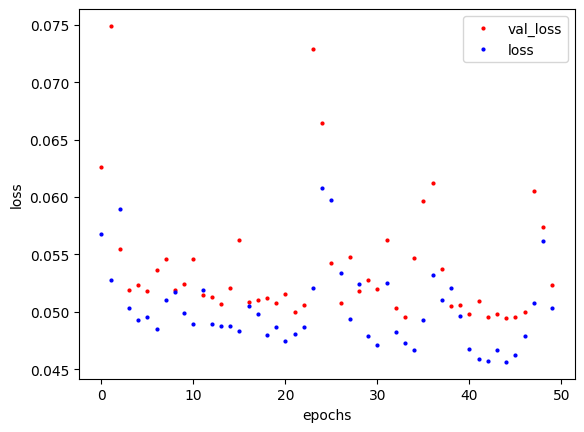

In [302]:
x_len = np.arange(len(y_loss)) #x_len >> epochs

plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label='val_loss')
plt.plot(x_len, y_loss, "o", c='blue', markersize=2, label='loss')

plt.legend(loc='best')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()